In [92]:
# general imports
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!hostname

s21n74


In [2]:
os.chdir('/home/astridkd/JSP_misc/mutational_signatures/Til_Astrid/Data')

In [3]:
# Read data, only HMF
mut_data = pd.read_csv("SNV_mutation_catalogue_HMF.tsv", sep='\t')

In [4]:
mut_data # columns mutation types, rows samples

,File,Sample_ID,i,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,../../../../HartwigMedical/faststorage/Origini...,CPCT02010349T,1,47,35,11,42,62,31,13,...,12,21,16,19,48,20,18,18,34,35
1,../../../../HartwigMedical/faststorage/Origini...,CPCT02010350T,2,107,73,17,71,77,91,16,...,18,46,10,22,25,24,24,13,41,43
2,../../../../HartwigMedical/faststorage/Origini...,CPCT02010351T,3,119,93,30,88,120,92,36,...,76,117,33,26,63,72,49,47,69,124
3,../../../../HartwigMedical/faststorage/Origini...,CPCT02010352T,4,34,29,4,20,31,27,6,...,11,22,8,19,24,17,10,9,18,30
4,../../../../HartwigMedical/faststorage/Origini...,CPCT02010356T,5,595,304,135,373,622,532,150,...,62,65,21,11,56,37,63,31,59,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,../../../../HartwigMedical/faststorage/Origini...,DRUP01340013T,3627,1021,345,71,417,547,255,66,...,272,6442,74,124,142,1572,233,179,257,2224
3627,../../../../HartwigMedical/faststorage/Origini...,DRUP01340014T,3628,89,72,18,57,57,53,17,...,19,26,14,10,16,23,32,18,25,70
3628,../../../../HartwigMedical/faststorage/Origini...,DRUP01340015T,3629,148,111,21,108,92,113,15,...,39,185,24,18,38,41,71,33,39,132
3629,../../../../HartwigMedical/faststorage/Origini...,DRUP01340017T,3630,1111,693,70,880,1664,2595,392,...,935,7054,160,499,717,3671,574,509,1112,7067


In [5]:
mut_data = mut_data.iloc[:, 3:] # from column index 3

In [6]:
mut_data

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,47,35,11,42,62,31,13,47,34,17,...,12,21,16,19,48,20,18,18,34,35
1,107,73,17,71,77,91,16,78,42,67,...,18,46,10,22,25,24,24,13,41,43
2,119,93,30,88,120,92,36,133,67,56,...,76,117,33,26,63,72,49,47,69,124
3,34,29,4,20,31,27,6,20,14,17,...,11,22,8,19,24,17,10,9,18,30
4,595,304,135,373,622,532,150,512,390,298,...,62,65,21,11,56,37,63,31,59,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1021,345,71,417,547,255,66,487,1381,293,...,272,6442,74,124,142,1572,233,179,257,2224
3627,89,72,18,57,57,53,17,69,72,48,...,19,26,14,10,16,23,32,18,25,70
3628,148,111,21,108,92,113,15,105,70,59,...,39,185,24,18,38,41,71,33,39,132
3629,1111,693,70,880,1664,2595,392,6491,1056,1893,...,935,7054,160,499,717,3671,574,509,1112,7067


PCA not scaled

In [7]:
# not scaled
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(mut_data)

In [8]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.82465633 0.07364985]


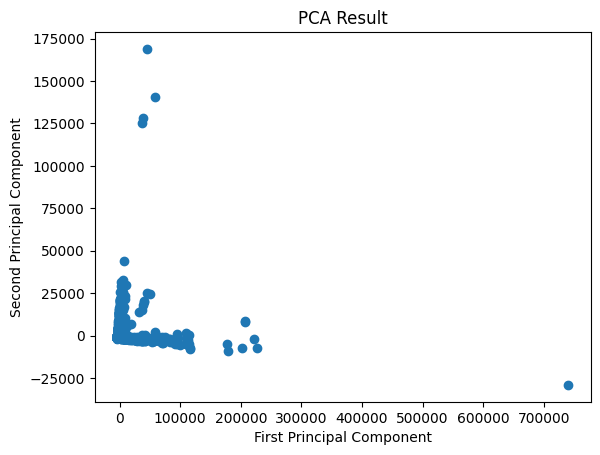

In [9]:
import matplotlib.pyplot as plt

# Visualizing the two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.show()

PCA scaled

In [10]:
# scaled to zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(mut_data)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [12]:
pca_result_scaled

array([[-3.35469298e+00, -1.03388364e-01, -3.96129959e-01,
        -4.52970666e-01,  3.14758430e-02, -3.65413896e-01],
       [-3.13419777e+00,  4.11607557e-02, -2.30703137e-01,
        -4.43958674e-01,  1.61634578e-02, -4.65186040e-01],
       [-1.92645224e+00, -6.19911551e-02, -3.10976271e-01,
        -5.39242841e-02,  7.93888199e-02,  9.08379206e-02],
       ...,
       [-2.47372564e+00,  1.70914067e-01, -1.53446814e-01,
        -1.27274180e-01, -4.47168124e-02, -3.99745452e-01],
       [ 3.13337565e+01, -1.73798152e+01, -9.00302356e+00,
         1.27886809e+00, -6.12335256e+00,  1.35783450e+00],
       [ 5.71862066e+00, -4.44849432e+00, -1.37425320e+00,
         6.82589763e+00, -5.12288688e+00,  1.33215063e-01]])

In [13]:
np.max(pca_result_scaled)

np.float64(123.92868206246655)

In [14]:
np.mean(pca_result_scaled)

np.float64(0.0)

In [15]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.47686161 0.16206153 0.08432713 0.05924647 0.03658989 0.03435465]


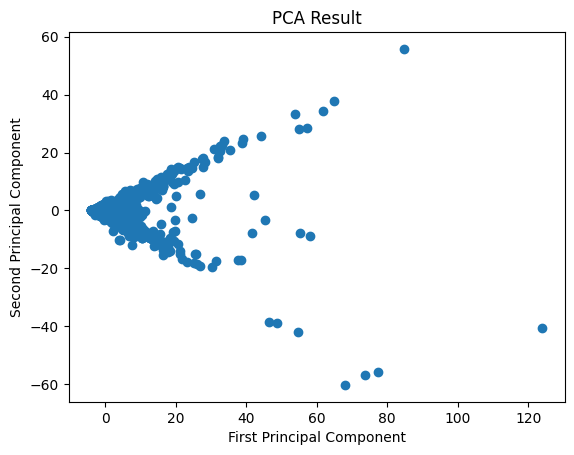

In [16]:
# Visualizing the two principal components
plt.scatter(pca_result_scaled[:, 0], pca_result_scaled[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.show()

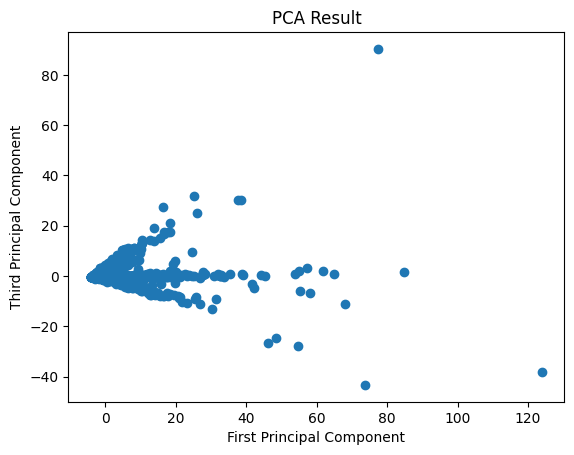

In [17]:
# Visualizing the two principal components
plt.scatter(pca_result_scaled[:, 0], pca_result_scaled[:, 2])
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.show()

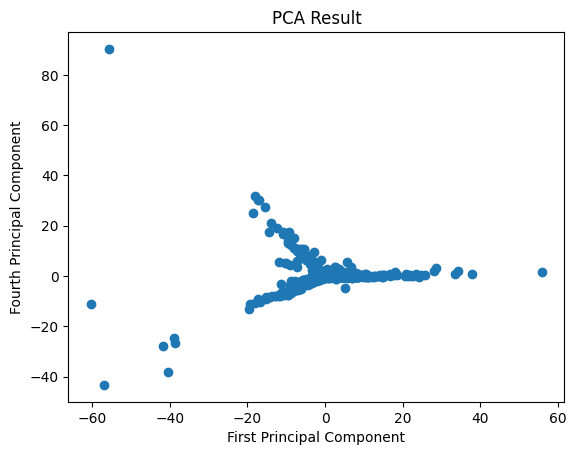

In [18]:
# Visualizing the two principal components
plt.scatter(pca_result_scaled[:, 1], pca_result_scaled[:, 2])
plt.xlabel('First Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('PCA Result')
plt.show()

Load tissue type

In [19]:
df_tissue = pd.read_csv("Cancertypes_jan2021.tsv", sep='\t')

In [20]:
df_tissue

,Donor_ID,cancertype,primaryTumorLocation,Study
0,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
1,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
2,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
3,DO555,Bladder Urothelial Cancer,Bladder,PCAWG
4,DO555,Bladder Urothelial Cancer,Bladder,PCAWG
...,...,...,...,...
10164,DRUP01010035,Head and neck Salivary Gland,Head and neck,HMF
10165,DRUP01050010,Head and neck Nasal cavity and paranasal sinuses,Head and neck,HMF
10166,DRUP01090012,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
10167,CPCT02030259,Ovary Cancer,Ovary,HMF


In [21]:
df_tissue['Donor_ID'] = df_tissue['Donor_ID'] + 'T' # make identical names

In [22]:
# Read data, only HMF
mut_data = pd.read_csv("SNV_mutation_catalogue_HMF.tsv", sep='\t')

In [23]:
# read mut_data again, only HMF matches
df_merged = pd.merge(mut_data, df_tissue, left_on='Sample_ID', right_on='Donor_ID', how='inner')

In [24]:
df_merged

,File,Sample_ID,i,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,...,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Donor_ID,cancertype,primaryTumorLocation,Study
0,../../../../HartwigMedical/faststorage/Origini...,CPCT02010349T,1,47,35,11,42,62,31,13,...,48,20,18,18,34,35,CPCT02010349T,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
1,../../../../HartwigMedical/faststorage/Origini...,CPCT02010350T,2,107,73,17,71,77,91,16,...,25,24,24,13,41,43,CPCT02010350T,Unknown CUP,Unknown,HMF
2,../../../../HartwigMedical/faststorage/Origini...,CPCT02010351T,3,119,93,30,88,120,92,36,...,63,72,49,47,69,124,CPCT02010351T,Breast ER-positive/HER2-negative,Breast,HMF
3,../../../../HartwigMedical/faststorage/Origini...,CPCT02010352T,4,34,29,4,20,31,27,6,...,24,17,10,9,18,30,CPCT02010352T,NET Small Intestinal,NET,HMF
4,../../../../HartwigMedical/faststorage/Origini...,CPCT02010356T,5,595,304,135,373,622,532,150,...,56,37,63,31,59,126,CPCT02010356T,Lung Non-Small cell,Lung,HMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,../../../../HartwigMedical/faststorage/Origini...,DRUP01340013T,3627,1021,345,71,417,547,255,66,...,142,1572,233,179,257,2224,DRUP01340013T,Esophagus Cancer,Esophagus,HMF
3513,../../../../HartwigMedical/faststorage/Origini...,DRUP01340014T,3628,89,72,18,57,57,53,17,...,16,23,32,18,25,70,DRUP01340014T,Uterus Endometrial,Uterus,HMF
3514,../../../../HartwigMedical/faststorage/Origini...,DRUP01340015T,3629,148,111,21,108,92,113,15,...,38,41,71,33,39,132,DRUP01340015T,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
3515,../../../../HartwigMedical/faststorage/Origini...,DRUP01340017T,3630,1111,693,70,880,1664,2595,392,...,717,3671,574,509,1112,7067,DRUP01340017T,Colorectal Cancer,Colorectal,HMF


In [25]:
# save to file for the same order of mut sig data
df_merged.to_csv('sample_order.tsv', sep='\t', index=False)

In [26]:
# missing samples, bc they have an extra T
3631-3517

114

In [27]:
label_counts = df_merged['primaryTumorLocation'].value_counts()
label_counts

primaryTumorLocation
Breast              646
Colorectal          486
Lung                357
Prostate            343
Skin                279
Bone/Soft tissue    158
Ovary               142
Esophagus           137
Urinary tract       133
NET                 100
Kidney               98
Biliary              79
CNS                  78
Unknown              77
Pancreas             76
Uterus               67
Head and neck        60
Liver                47
Stomach              39
Mesothelioma         33
Lymphoid             20
Thyroid              18
Small intestine      14
Vulva                 8
Thymus                5
Penile                5
Adrenal               4
Testis                4
Myeloid               2
Double primary        1
Eye                   1
Name: count, dtype: int64

In [28]:
# remove rows where the tissue type only appears once in the df
#df_merged = df_merged[df_merged['primaryTumorLocation'].map(df_merged['primaryTumorLocation'].value_counts()) > 1]

In [29]:
label_counts = df_merged['primaryTumorLocation'].value_counts()
label_counts

primaryTumorLocation
Breast              646
Colorectal          486
Lung                357
Prostate            343
Skin                279
Bone/Soft tissue    158
Ovary               142
Esophagus           137
Urinary tract       133
NET                 100
Kidney               98
Biliary              79
CNS                  78
Unknown              77
Pancreas             76
Uterus               67
Head and neck        60
Liver                47
Stomach              39
Mesothelioma         33
Lymphoid             20
Thyroid              18
Small intestine      14
Vulva                 8
Thymus                5
Penile                5
Adrenal               4
Testis                4
Myeloid               2
Double primary        1
Eye                   1
Name: count, dtype: int64

In [30]:
# Color palette in group
# Bone/Soft tissue gets soft tissue color from palette
# Lymphoid gets Lymph Nodes color
# Adrenal gets Adrenal Gland
# The rest get black for now
palette = {'Double primary': 'black',  'Myeloid': 'saddlebrown',  'Penile': 'lime',  'Vulva': 'aqua',  'Small intestine': 'violet',  'Lymphoid': '#3953A4',  'Mesothelioma': 'purple',  'Unknown':'black',  'CNS':'orange',  'Biliary':'red',  'NET': 'blue', 'Urinary tract': 'green', 'Bone/Soft tissue': '#00A99D', 'Breast': '#ED1E91',  'Lung': '#A084BD',  'Stomach': '#00AEEF',  'Colorectal': '#DAF1FC',  'Bile Duct': '#104A7F',  'Liver': '#CACDDD',  'Prostate': '#7F1717',  'Kidney': '#F8AEB2',  'Bone Marrow': '#744C27',  'Adrenal': '#CCAB8E',  'Thymus': '#CCAB8E',  'Skin': '#BAD543',  'Head and neck': '#97D1A9',  'Testis': '#BE1D2C',  'Pancreas': '#6E7BA3',  'Pleura': '#542C88',  'Thyroid': '#F4ED2F',  'Brain': '#D49DC6',  'Esophagus': '#007DB4',  'Bladder': '#F9D2DB',  'Eye': '#0D9344',  'Uterus': '#FBE3C7',  'Cervix': '#F7B666',  'Ovary': '#DA7D27'}


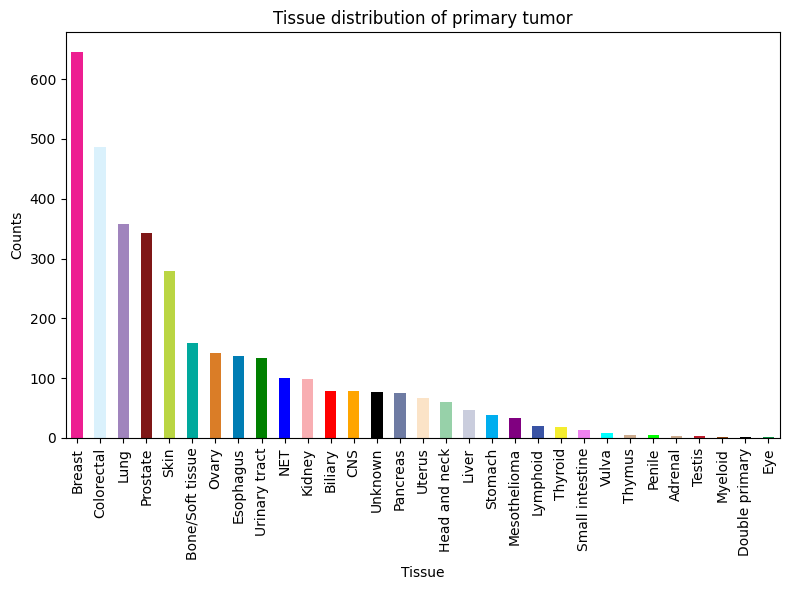

In [31]:
colors = [palette[label] for label in label_counts.index]

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=colors) # remove edgecolor

# Add labels and title
plt.xlabel('Tissue')
plt.ylabel('Counts')
plt.title('Tissue distribution of primary tumor')
plt.xticks(rotation=90)
plt.tight_layout()

In [32]:
# save to file for DGD setup
df_merged.to_csv('to_dgd.tsv', sep='\t', index=False)

In [33]:
# remove non-number columns, also remove the i column
df_toPCA = df_merged.select_dtypes(include=['number'])

In [34]:
df_toPCA = df_toPCA.iloc[:,1:]

In [35]:
df_toPCA

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,47,35,11,42,62,31,13,47,34,17,...,12,21,16,19,48,20,18,18,34,35
1,107,73,17,71,77,91,16,78,42,67,...,18,46,10,22,25,24,24,13,41,43
2,119,93,30,88,120,92,36,133,67,56,...,76,117,33,26,63,72,49,47,69,124
3,34,29,4,20,31,27,6,20,14,17,...,11,22,8,19,24,17,10,9,18,30
4,595,304,135,373,622,532,150,512,390,298,...,62,65,21,11,56,37,63,31,59,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,1021,345,71,417,547,255,66,487,1381,293,...,272,6442,74,124,142,1572,233,179,257,2224
3513,89,72,18,57,57,53,17,69,72,48,...,19,26,14,10,16,23,32,18,25,70
3514,148,111,21,108,92,113,15,105,70,59,...,39,185,24,18,38,41,71,33,39,132
3515,1111,693,70,880,1664,2595,392,6491,1056,1893,...,935,7054,160,499,717,3671,574,509,1112,7067


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_toPCA)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [38]:
pca_result_scaled

array([[-3.33230123e+00, -1.13414095e-01, -3.91214039e-01,
        -4.52061446e-01,  4.00419885e-02],
       [-3.11389186e+00,  2.91269731e-02, -2.25502818e-01,
        -4.42266927e-01,  2.54057724e-02],
       [-1.91103592e+00, -7.13226730e-02, -3.09773620e-01,
        -5.94346958e-02,  7.89651589e-02],
       ...,
       [-2.45762412e+00,  1.57001092e-01, -1.52277102e-01,
        -1.30402501e-01, -4.06006154e-02],
       [ 3.11711009e+01, -1.72428719e+01, -8.90286556e+00,
         1.28852115e+00, -6.20616438e+00],
       [ 5.68778494e+00, -4.42767264e+00, -1.39538994e+00,
         6.72729806e+00, -5.22087313e+00]])

In [39]:
np.max(pca_result_scaled)

np.float64(123.23718200578777)

In [40]:
np.mean(pca_result_scaled)

np.float64(1.6162473375265286e-17)

In [41]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.47697389 0.16127826 0.0841059  0.05950904 0.03678021]


In [42]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [43]:
pca_result_df['primaryTumorLocation'] = df_merged['primaryTumorLocation']

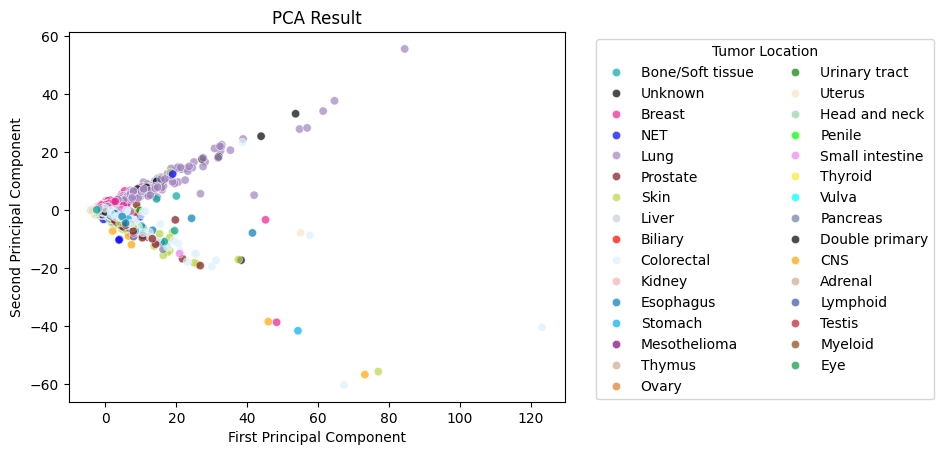

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

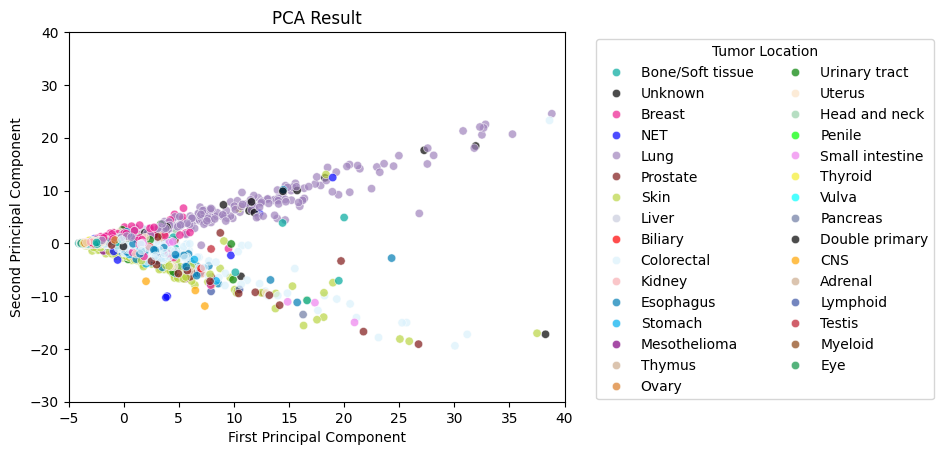

In [46]:
# zoom in on center cluster

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-5, 40)  # zoom
plt.ylim(-30, 40)

plt.show()

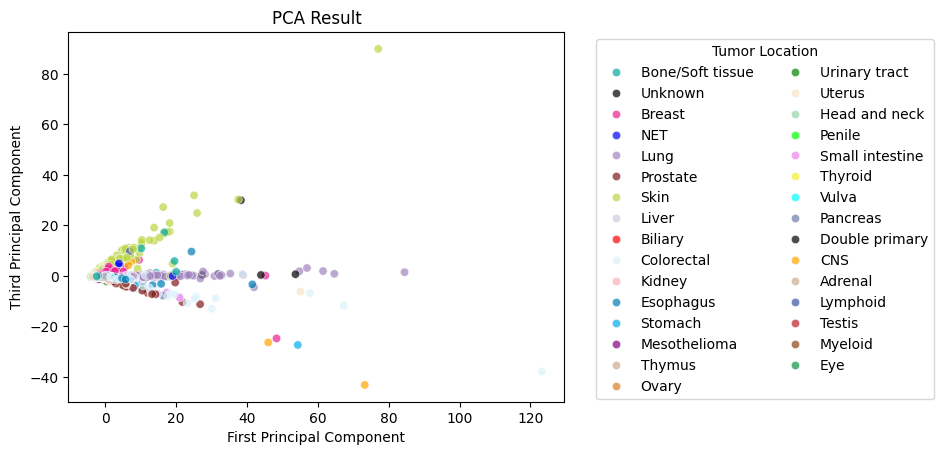

In [47]:
sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

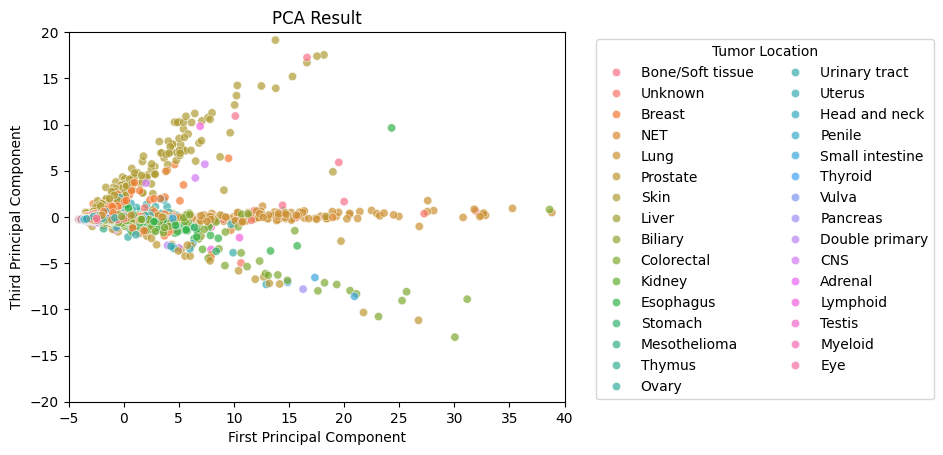

In [43]:
# zoom in on center cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='primaryTumorLocation', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-5, 40)
plt.ylim(-20, 20)

plt.show()

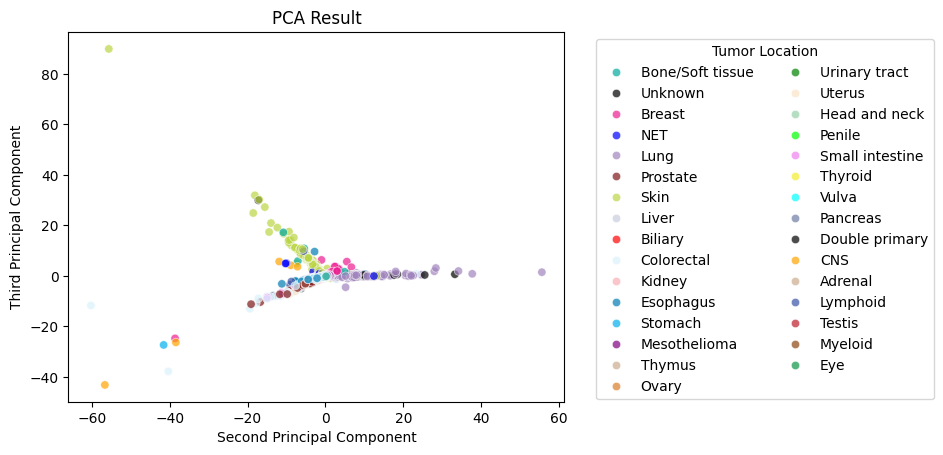

In [48]:
sns.scatterplot(data=pca_result_df, x='PC2', y='PC3', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

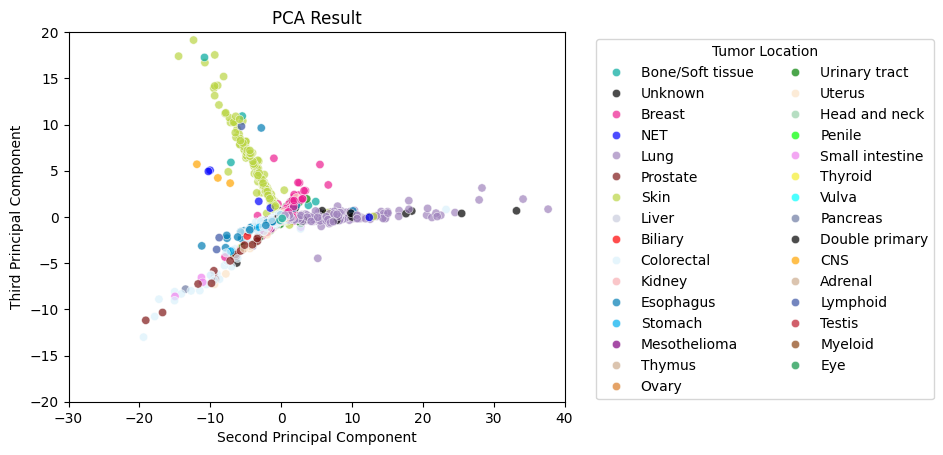

In [49]:
# zoom in on center cluster

sns.scatterplot(data=pca_result_df, x='PC2', y='PC3', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-30, 40)
plt.ylim(-20, 20)

plt.show()

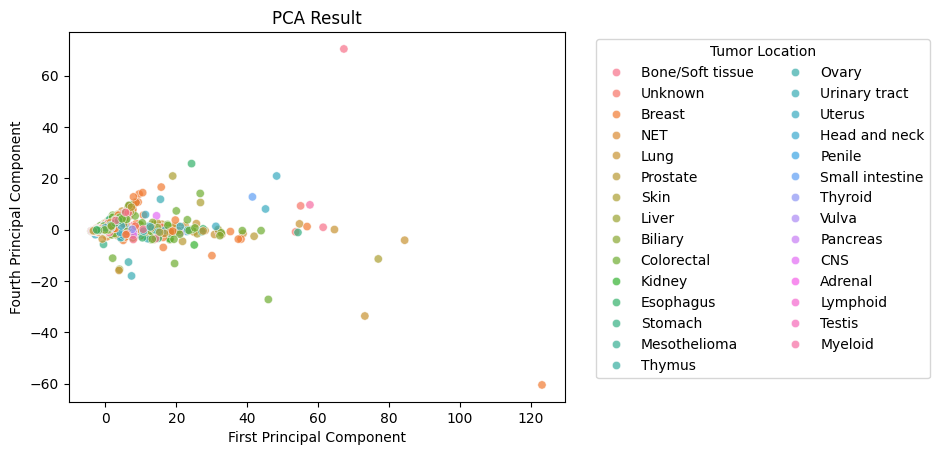

In [213]:
sns.scatterplot(data=pca_result_df, x='PC1', y='PC4', hue='primaryTumorLocation', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

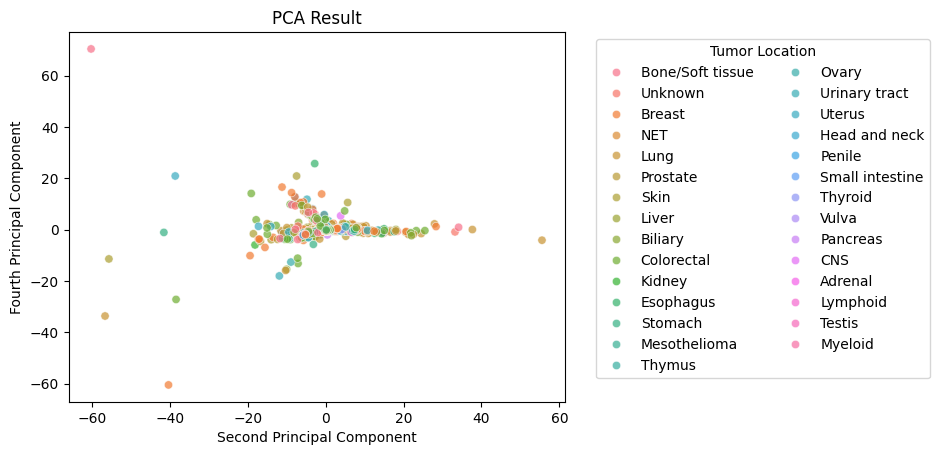

In [214]:
sns.scatterplot(data=pca_result_df, x='PC2', y='PC4', hue='primaryTumorLocation', alpha=0.7)
plt.xlabel('Second Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

# Normalized counts (frequencies)

In [50]:
# general imports
import sys
import os
import numpy as np
import pandas as pd

In [51]:
os.chdir('/home/astridkd/JSP_misc/mutational_signatures/Til_Astrid/Data')

In [52]:
df_toFreq = pd.read_csv("to_dgd.tsv", sep='\t')

In [53]:
df_toFreq

,File,Sample_ID,i,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,...,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Donor_ID,cancertype,primaryTumorLocation,Study
0,../../../../HartwigMedical/faststorage/Origini...,CPCT02010349T,1,47,35,11,42,62,31,13,...,48,20,18,18,34,35,CPCT02010349T,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
1,../../../../HartwigMedical/faststorage/Origini...,CPCT02010350T,2,107,73,17,71,77,91,16,...,25,24,24,13,41,43,CPCT02010350T,Unknown CUP,Unknown,HMF
2,../../../../HartwigMedical/faststorage/Origini...,CPCT02010351T,3,119,93,30,88,120,92,36,...,63,72,49,47,69,124,CPCT02010351T,Breast ER-positive/HER2-negative,Breast,HMF
3,../../../../HartwigMedical/faststorage/Origini...,CPCT02010352T,4,34,29,4,20,31,27,6,...,24,17,10,9,18,30,CPCT02010352T,NET Small Intestinal,NET,HMF
4,../../../../HartwigMedical/faststorage/Origini...,CPCT02010356T,5,595,304,135,373,622,532,150,...,56,37,63,31,59,126,CPCT02010356T,Lung Non-Small cell,Lung,HMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,../../../../HartwigMedical/faststorage/Origini...,DRUP01340013T,3627,1021,345,71,417,547,255,66,...,142,1572,233,179,257,2224,DRUP01340013T,Esophagus Cancer,Esophagus,HMF
3513,../../../../HartwigMedical/faststorage/Origini...,DRUP01340014T,3628,89,72,18,57,57,53,17,...,16,23,32,18,25,70,DRUP01340014T,Uterus Endometrial,Uterus,HMF
3514,../../../../HartwigMedical/faststorage/Origini...,DRUP01340015T,3629,148,111,21,108,92,113,15,...,38,41,71,33,39,132,DRUP01340015T,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
3515,../../../../HartwigMedical/faststorage/Origini...,DRUP01340017T,3630,1111,693,70,880,1664,2595,392,...,717,3671,574,509,1112,7067,DRUP01340017T,Colorectal Cancer,Colorectal,HMF


In [54]:
# only mutation count columns
df_toFreq2 = df_toFreq.iloc[:,3:-4]

In [55]:
# mutation frequencies for each sample
df_freq = df_toFreq2.div(df_toFreq2.sum(axis=1), axis=0)

In [56]:
df_freq

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,0.010704,0.007971,0.002505,0.009565,0.014120,0.007060,0.002961,0.010704,0.007743,0.003872,...,0.002733,0.004783,0.003644,0.004327,0.010931,0.004555,0.004099,0.004099,0.007743,0.007971
1,0.018496,0.012619,0.002939,0.012273,0.013310,0.015730,0.002766,0.013483,0.007260,0.011582,...,0.003111,0.007952,0.001729,0.003803,0.004322,0.004149,0.004149,0.002247,0.007087,0.007433
2,0.010955,0.008561,0.002762,0.008101,0.011047,0.008469,0.003314,0.012243,0.006168,0.005155,...,0.006996,0.010771,0.003038,0.002393,0.005800,0.006628,0.004511,0.004327,0.006352,0.011415
3,0.013487,0.011503,0.001587,0.007933,0.012297,0.010710,0.002380,0.007933,0.005553,0.006743,...,0.004363,0.008727,0.003173,0.007537,0.009520,0.006743,0.003967,0.003570,0.007140,0.011900
4,0.038395,0.019617,0.008711,0.024069,0.040137,0.034329,0.009679,0.033039,0.025166,0.019230,...,0.004001,0.004194,0.001355,0.000710,0.003614,0.002388,0.004065,0.002000,0.003807,0.008131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,0.019950,0.006741,0.001387,0.008148,0.010688,0.004983,0.001290,0.009516,0.026984,0.005725,...,0.005315,0.125874,0.001446,0.002423,0.002775,0.030716,0.004553,0.003498,0.005022,0.043456
3513,0.018294,0.014800,0.003700,0.011716,0.011716,0.010894,0.003494,0.014183,0.014800,0.009866,...,0.003905,0.005344,0.002878,0.002055,0.003289,0.004728,0.006578,0.003700,0.005139,0.014388
3514,0.019196,0.014397,0.002724,0.014008,0.011933,0.014656,0.001946,0.013619,0.009079,0.007652,...,0.005058,0.023995,0.003113,0.002335,0.004929,0.005318,0.009209,0.004280,0.005058,0.017121
3515,0.004729,0.002950,0.000298,0.003746,0.007083,0.011046,0.001669,0.027630,0.004495,0.008058,...,0.003980,0.030027,0.000681,0.002124,0.003052,0.015626,0.002443,0.002167,0.004733,0.030082


In [57]:
# add tissue again
df_freq_tissue = df_freq.copy()
df_freq_tissue['primaryTumorLocation'] = df_toFreq['primaryTumorLocation']
df_freq_tissue

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,...,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,primaryTumorLocation
0,0.010704,0.007971,0.002505,0.009565,0.014120,0.007060,0.002961,0.010704,0.007743,0.003872,...,0.004783,0.003644,0.004327,0.010931,0.004555,0.004099,0.004099,0.007743,0.007971,Bone/Soft tissue
1,0.018496,0.012619,0.002939,0.012273,0.013310,0.015730,0.002766,0.013483,0.007260,0.011582,...,0.007952,0.001729,0.003803,0.004322,0.004149,0.004149,0.002247,0.007087,0.007433,Unknown
2,0.010955,0.008561,0.002762,0.008101,0.011047,0.008469,0.003314,0.012243,0.006168,0.005155,...,0.010771,0.003038,0.002393,0.005800,0.006628,0.004511,0.004327,0.006352,0.011415,Breast
3,0.013487,0.011503,0.001587,0.007933,0.012297,0.010710,0.002380,0.007933,0.005553,0.006743,...,0.008727,0.003173,0.007537,0.009520,0.006743,0.003967,0.003570,0.007140,0.011900,NET
4,0.038395,0.019617,0.008711,0.024069,0.040137,0.034329,0.009679,0.033039,0.025166,0.019230,...,0.004194,0.001355,0.000710,0.003614,0.002388,0.004065,0.002000,0.003807,0.008131,Lung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,0.019950,0.006741,0.001387,0.008148,0.010688,0.004983,0.001290,0.009516,0.026984,0.005725,...,0.125874,0.001446,0.002423,0.002775,0.030716,0.004553,0.003498,0.005022,0.043456,Esophagus
3513,0.018294,0.014800,0.003700,0.011716,0.011716,0.010894,0.003494,0.014183,0.014800,0.009866,...,0.005344,0.002878,0.002055,0.003289,0.004728,0.006578,0.003700,0.005139,0.014388,Uterus
3514,0.019196,0.014397,0.002724,0.014008,0.011933,0.014656,0.001946,0.013619,0.009079,0.007652,...,0.023995,0.003113,0.002335,0.004929,0.005318,0.009209,0.004280,0.005058,0.017121,Bone/Soft tissue
3515,0.004729,0.002950,0.000298,0.003746,0.007083,0.011046,0.001669,0.027630,0.004495,0.008058,...,0.030027,0.000681,0.002124,0.003052,0.015626,0.002443,0.002167,0.004733,0.030082,Colorectal


In [58]:
df_freq

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,G[C>A]A,G[C>A]C,...,C[T>G]G,C[T>G]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,0.010704,0.007971,0.002505,0.009565,0.014120,0.007060,0.002961,0.010704,0.007743,0.003872,...,0.002733,0.004783,0.003644,0.004327,0.010931,0.004555,0.004099,0.004099,0.007743,0.007971
1,0.018496,0.012619,0.002939,0.012273,0.013310,0.015730,0.002766,0.013483,0.007260,0.011582,...,0.003111,0.007952,0.001729,0.003803,0.004322,0.004149,0.004149,0.002247,0.007087,0.007433
2,0.010955,0.008561,0.002762,0.008101,0.011047,0.008469,0.003314,0.012243,0.006168,0.005155,...,0.006996,0.010771,0.003038,0.002393,0.005800,0.006628,0.004511,0.004327,0.006352,0.011415
3,0.013487,0.011503,0.001587,0.007933,0.012297,0.010710,0.002380,0.007933,0.005553,0.006743,...,0.004363,0.008727,0.003173,0.007537,0.009520,0.006743,0.003967,0.003570,0.007140,0.011900
4,0.038395,0.019617,0.008711,0.024069,0.040137,0.034329,0.009679,0.033039,0.025166,0.019230,...,0.004001,0.004194,0.001355,0.000710,0.003614,0.002388,0.004065,0.002000,0.003807,0.008131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,0.019950,0.006741,0.001387,0.008148,0.010688,0.004983,0.001290,0.009516,0.026984,0.005725,...,0.005315,0.125874,0.001446,0.002423,0.002775,0.030716,0.004553,0.003498,0.005022,0.043456
3513,0.018294,0.014800,0.003700,0.011716,0.011716,0.010894,0.003494,0.014183,0.014800,0.009866,...,0.003905,0.005344,0.002878,0.002055,0.003289,0.004728,0.006578,0.003700,0.005139,0.014388
3514,0.019196,0.014397,0.002724,0.014008,0.011933,0.014656,0.001946,0.013619,0.009079,0.007652,...,0.005058,0.023995,0.003113,0.002335,0.004929,0.005318,0.009209,0.004280,0.005058,0.017121
3515,0.004729,0.002950,0.000298,0.003746,0.007083,0.011046,0.001669,0.027630,0.004495,0.008058,...,0.003980,0.030027,0.000681,0.002124,0.003052,0.015626,0.002443,0.002167,0.004733,0.030082


In [59]:
# save for performance measure
df_freq_tissue.to_csv('freq_to_knn.tsv', sep='\t', index=False)

In [60]:
df_toFreq2.sum(axis=1)

0         4391
1         5785
2        10863
3         2521
4        15497
         ...  
3512     51178
3513      4865
3514      7710
3515    234925
3516     55572
Length: 3517, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
freq_scaled = scaler.fit_transform(df_freq)

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(freq_scaled) # df_freq

In [63]:
pca_result_scaled

array([[-4.51517983, -5.0350013 , -4.48415854,  2.26203773, -0.73422843],
       [-3.1898786 , -0.54246349, -0.9657211 , -0.21873416,  1.01467832],
       [-2.38447216, -1.98450552, -1.25137595,  3.1401744 , -0.77491425],
       ...,
       [-5.09802142,  0.01439812,  1.04974034,  1.82531342,  2.14872556],
       [ 2.03888651, -6.58170132, -2.38269703, -7.14323768, -2.81599161],
       [ 2.197317  , -5.68977641, 11.84098685, -1.45920203,  1.55416269]])

In [64]:
np.max(pca_result_scaled)

np.float64(17.37369886621953)

In [65]:
np.mean(pca_result_scaled)

np.float64(2.424371006289793e-18)

In [66]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28649616 0.16168889 0.08872684 0.0704472  0.05696532]


In [67]:
sum([0.28649616, 0.16168889, 0.08872684, 0.0704472,  0.05696532])

0.66432441

In [68]:
sum([0.28649616, 0.16168889])

0.44818505

In [69]:
# make df and combine by index order
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [70]:
pca_result_df['primaryTumorLocation'] = df_merged['primaryTumorLocation']
pca_result_df

,PC1,PC2,PC3,PC4,PC5,primaryTumorLocation
0,-4.515180,-5.035001,-4.484159,2.262038,-0.734228,Bone/Soft tissue
1,-3.189879,-0.542463,-0.965721,-0.218734,1.014678,Unknown
2,-2.384472,-1.984506,-1.251376,3.140174,-0.774914,Breast
3,-5.609512,-4.523175,-1.762690,1.868660,1.004695,NET
4,-4.885241,9.057335,-0.652539,-2.326951,0.664241,Lung
...,...,...,...,...,...,...
3512,2.031549,-2.046752,8.019413,-2.426874,0.005172,Esophagus
3513,-1.950713,1.372880,-0.676772,0.148555,0.185531,Uterus
3514,-5.098021,0.014398,1.049740,1.825313,2.148726,Bone/Soft tissue
3515,2.038887,-6.581701,-2.382697,-7.143238,-2.815992,Colorectal


In [65]:
# save for performance measure
pca_result_df.to_csv('HMF_to_knn.tsv', sep='\t', index=False)


In [79]:
palette = {'Double primary': 'black',  'Myeloid': 'saddlebrown',  'Penile': 'lime',  'Vulva': 'aqua',  'Small intestine': 'violet',  'Lymphoid': '#3953A4',  'Mesothelioma': 'purple',  'Unknown':'black',  'CNS':'orange',  'Biliary':'red',  'NET': 'blue', 'Urinary tract': 'green', 'Bone/Soft tissue': '#00A99D', 'Breast': '#ED1E91',  'Lung': '#A084BD',  'Stomach': '#00AEEF',  'Colorectal': '#DAF1FC',  'Bile Duct': '#104A7F',  'Liver': '#CACDDD',  'Prostate': '#7F1717',  'Kidney': '#F8AEB2',  'Bone Marrow': '#744C27',  'Adrenal': '#CCAB8E',  'Thymus': '#CCAB8E',  'Skin': '#BAD543',  'Head and neck': '#97D1A9',  'Testis': '#BE1D2C',  'Pancreas': '#6E7BA3',  'Pleura': '#542C88',  'Thyroid': '#F4ED2F',  'Brain': '#D49DC6',  'Esophagus': '#007DB4',  'Bladder': '#F9D2DB',  'Eye': '#0D9344',  'Uterus': '#FBE3C7',  'Cervix': '#F7B666',  'Ovary': '#DA7D27'}

In [85]:
pca_result_df_plot = pca_result_df.drop(pca_result_df[pca_result_df['primaryTumorLocation'] == 'Double primary'].index)

In [86]:
pca_result_df_plot = pca_result_df_plot.drop(pca_result_df[pca_result_df['primaryTumorLocation'] == 'Eye'].index)

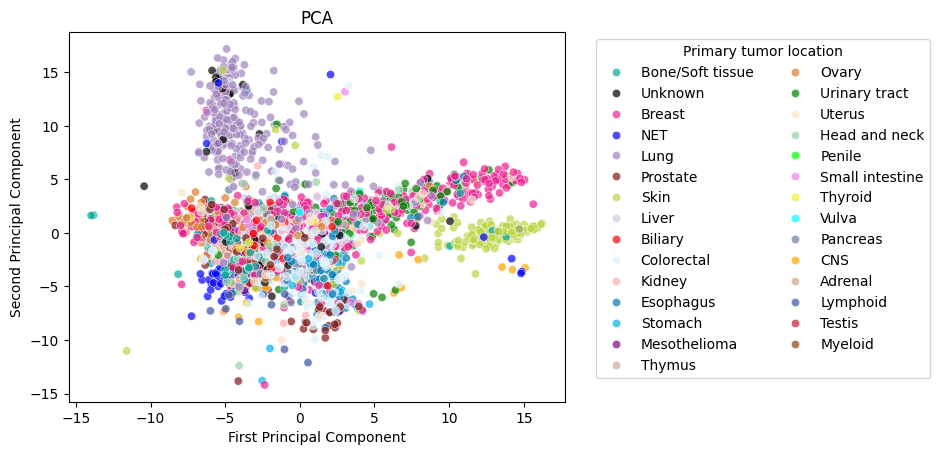

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df_plot, x='PC1', y='PC2', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')
plt.legend(title='Primary tumor location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

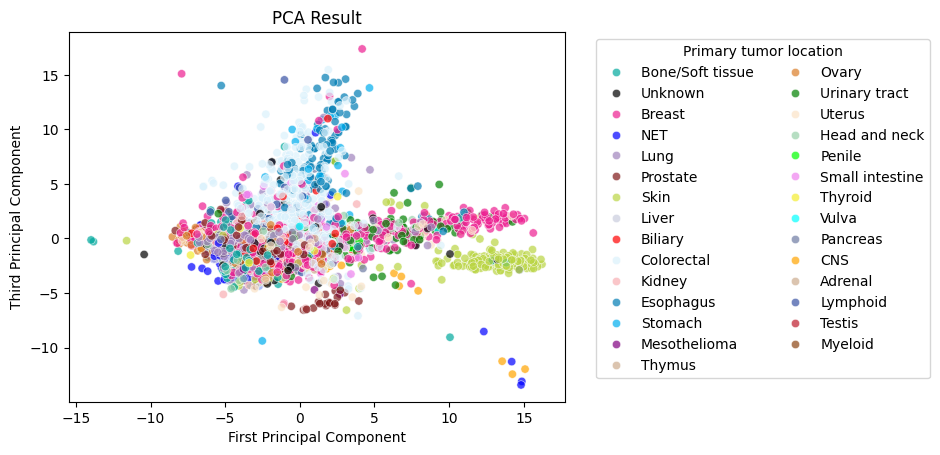

In [89]:
sns.scatterplot(data=pca_result_df_plot, x='PC1', y='PC3', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Primary tumor location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

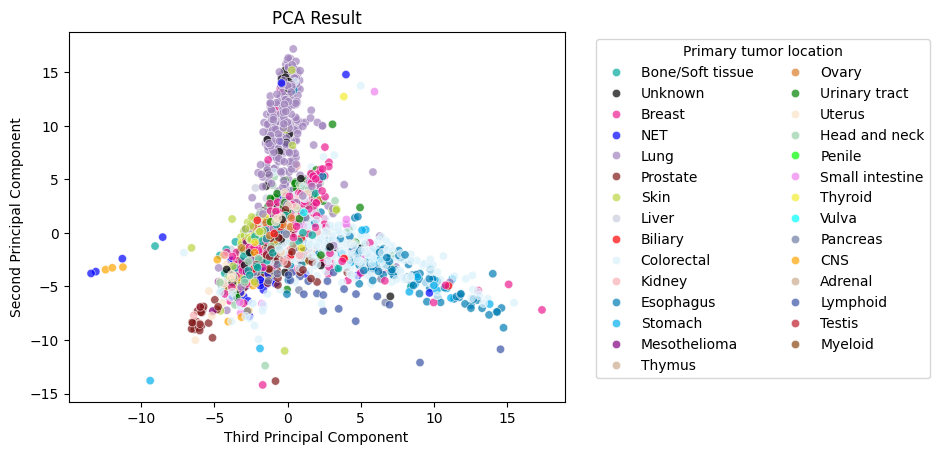

In [91]:
sns.scatterplot(data=pca_result_df_plot, x='PC3', y='PC2', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('Third Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Primary tumor location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

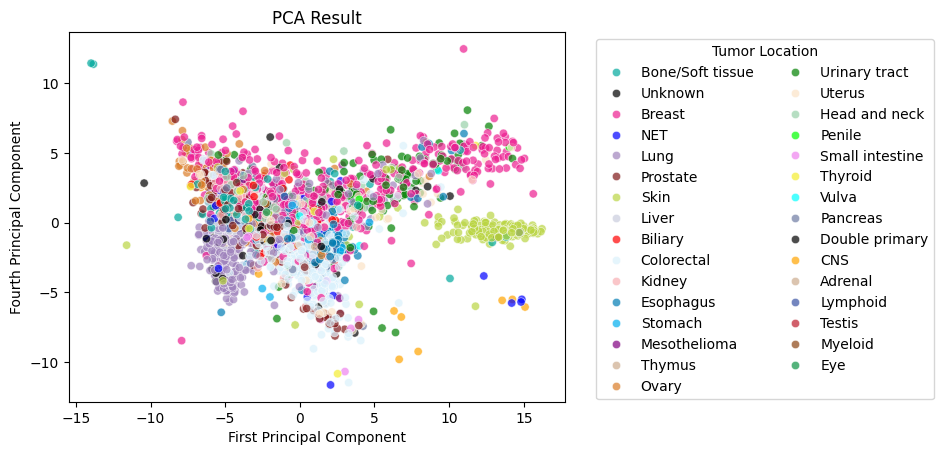

In [78]:
sns.scatterplot(data=pca_result_df, x='PC1', y='PC4', hue='primaryTumorLocation', alpha=0.7, palette=palette)
plt.xlabel('First Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

In [1]:
df_merged

NameError: name 'df_merged' is not defined

In [13]:
unique_values = df_merged['primaryTumorLocation'].unique().tolist()

In [14]:
unique_values

['Bone/Soft tissue',
 'Unknown',
 'Breast',
 'NET',
 'Lung',
 'Prostate',
 'Skin',
 'Liver',
 'Biliary',
 'Colorectal',
 'Kidney',
 'Esophagus',
 'Stomach',
 'Mesothelioma',
 'Thymus',
 'Ovary',
 'Urinary tract',
 'Uterus',
 'Head and neck',
 'Penile',
 'Small intestine',
 'Thyroid',
 'Vulva',
 'Pancreas',
 'Double primary',
 'CNS',
 'Adrenal',
 'Lymphoid',
 'Testis',
 'Myeloid',
 'Eye']

In [15]:
len(unique_values)

31

In [18]:
# Color palette in group
Colors = {'Breast': '#ED1E91',  'Lung': '#A084BD',  'Stomach': '#00AEEF',  'Colorectal': '#DAF1FC',  'Lymph Nodes': '#3953A4',  'Bile Duct': '#104A7F',  'Liver': '#CACDDD',  'Prostate': '#7F1717',  'Kidney': '#F8AEB2',  'Bone Marrow': '#744C27',  'Adrenal Gland': '#CCAB8E',  'Thymus': '#CCAB8E',  'Skin': '#BAD543',  'Soft Tissue': '#00A99D',  'Head and Neck': '#97D1A9',  'Testis': '#BE1D2C',  'Pancreas': '#6E7BA3',  'Pleura': '#542C88',  'Thyroid': '#F4ED2F',  'Brain': '#D49DC6',  'Esophagus': '#007DB4',  'Bladder': '#F9D2DB',  'Eye': '#0D9344',  'Uterus': '#FBE3C7',  'Cervix': '#F7B666',  'Ovary': '#DA7D27'}